In [1]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(os.path.expanduser('~'))

C:\Users\admin


In [3]:
root_dir = os.path.abspath('.')
data_dir = 'S:/kryptoblocks/age detection'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))


Age: YOUNG


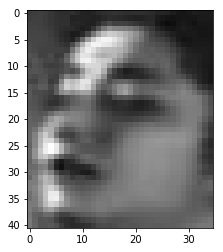

In [4]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))

imshow(img)
print('Age:', train.Class[i])

In [5]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)


In [6]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

FileNotFoundError: [Errno 2] No such file or directory: 'S:/kryptoblocks/age detection\\Test\\25321.jpg'

In [ ]:
train_x = train_x / 255.
#test_x = test_x / 255.
train_x


In [ ]:
train.Class.value_counts(normalize=True)


In [ ]:
test['Class'] = 'MIDDLE'
test.to_csv('sub01.csv', index=False)


In [ ]:

import keras


In [ ]:
import keras
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [ ]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [ ]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

In [ ]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

In [ ]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('sub02.csv', index=False)

In [ ]:
i = random.choice(train.index)
img_name = train.ID[i]

img = imread(os.path.join(data_dir, 'Train', img_name)).astype('float32')
imshow(imresize(img, (128, 128)))
pred = model.predict_classes(train_x)
print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred[i]))

